# Turing Machine and Deep Learning

## Assignment 2: Supervised Classification Problems

This notebook is meant for you to review and reflect on the content of Lecture 2, which was mainly about supervised learning problems in the general context of classification. We will reflect mainly on model and hyperparameter selection over the models we have discussed during the lecture: logistic regression, decision trees, random forests and support vector machines. This notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


# Question 1 -- Classification Metrics

To contextualise, we learnt of 4 metrics in class: accuracy, precision, recall and F1 score. Answer the following text questions in the following markdown cell.
1. For accuracy, precision and recall, mention one specific example *each* (i.e. a well-defined problem where ML can be used) where they would be preferable.
2. For accuracy, precision and recall, mention one specific example *each* (i.e. a well-defined problem where ML can be used) where they would fail.
3. In which situations would the F1 score be helpful? Give one concrete example.

1. Accuracy: email spam detection, Precision: Medical Disease diagnosis, Recall: missing person search and rescue (want to make sure we find as many missing people as possible)
2. Accuracy: fraud detection, Precision: Medicine testing (if a medicine is said to be okay when it's not), Recall: Airport Security
3. Combines both precision and recall, and therefore would be helpful in a situation like censorship on social media

## Question 2 -- CIFAR 10

As we've discussed last week, one of the prime issues with ML is figuring out what model you are going to use and when. In this case, we're going to use the [CIFAR-10](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10) dataset from TensorFlow, another benchmarking dataset. This is a considerably larger dataset, and contains coloured images. For the sake of computation time, we are just going to use the first 1000 training images but the full test set (though in a proper ML setting we would prefer to use all training data). The images are 32x32 coloured pixes. There are 10 labels which are integers by default. The dictionary `class_labels` translate them to their text label equivalents (referenced from [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)).

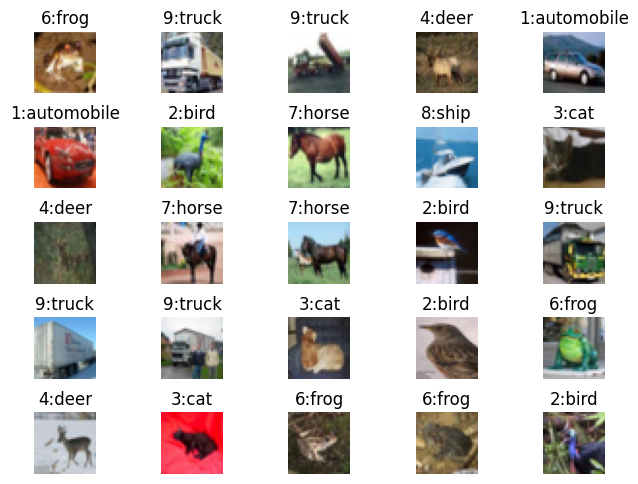

In [4]:
# don't need to edit anything here,
# just run this cell

# get dataset
from tensorflow.keras.datasets import cifar10
# get common libraries
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # this is a new one: makes loading bars

def get_data_subset(n_train, n_test):
    (train_X, train_y), (test_X, test_y) = cifar10.load_data()
    train_X, train_y, test_X, test_y = train_X[:n_train], train_y[:n_train], test_X[:n_test], test_y[:n_test]
    train_y, test_y = train_y.squeeze(), test_y.squeeze()
    return train_X, train_y, test_X, test_y

n_train, n_test = 1000, 1000

train_X, train_y, test_X, test_y = get_data_subset(n_train, n_test)

fig, axs = plt.subplots(5,5)
axs = axs.flatten()
fig.tight_layout(pad=0.3)

class_labels = {0:"airplane",
                1:"automobile",
                2:"bird",
                3:"cat",
                4:"deer",
                5:"dog",
                6:"frog",
                7:"horse",
                8:"ship",
                9:"truck"}

for i, ax in enumerate(axs):
    ax.imshow(train_X[i])
    ax.set_title(f"{train_y[i]}:{class_labels[train_y[i]]}")
    ax.axis("off")

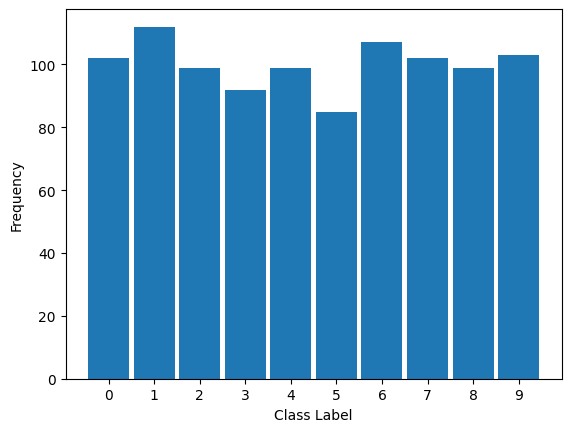

In [ ]:
# making sure the quantity of examples for each label are about the same
plt.hist(train_y, bins=10, rwidth=0.9)
plt.xticks(0.9*np.arange(10)+0.45, range(10))
plt.ylabel("Frequency")
plt.xlabel("Class Label")
plt.show()

## Question 2.1 -- Preprocessing

The first thing we should do is preprocess the images so that they are ready to be input into our models. First, print out the shape of the dataset's inputs (`train_X`).

In [ ]:
# Your answer here
print("Shape of train_X:", train_X.shape)

Shape of train_X: (1000, 32, 32, 3)


**Q 2.1.1** What does each value in the tuple that was printed out mean?

*Your answer here*

**Q 2.1.2** Next, flatten the pixel values to a single vector. What is the length of this vector? Print out the shape of the flattened dataset's inputs once more.

In [ ]:
def flatten_cifar10(samples):
    return samples.reshape(samples.shape[0], -1)

train_X_flattened = flatten_cifar10(train_X)
test_X_flattened = flatten_cifar10(test_X)

print("Shape of flattened train_X:", train_X_flattened.shape)
print("Shape of flattened test_X:", test_X_flattened.shape)

Shape of flattened train_X: (1000, 3072)
Shape of flattened test_X: (1000, 3072)


## Question 3 -- Model Selection using Grid Search

In the lecture, we have seen four different ML classification algorithms: logistic regression, decision trees, random forests and support vector machines. In this assignment, we will figure out which is best, and a basic method to figure out the best way to tune the parameters of each one. Remember, a hyperparameter is something that you choose by hand about the model or the way it trains.

### Question 3.1 -- Logistic regression

Use `sklearn` (as in the lecture notebook) to classify the CIFAR10 sub-dataset. There are not a lot of major hyperparameters to tune here, so this exercise should be straightforward. Create a LogisticRegression object, fit it on the training data, and compute the train and test accuracies.

*Expected runtime: ~1min*

In [11]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression object
modelLR = LogisticRegression(max_iter=1000)

# Fit on training data
modelLR.fit(train_X_flattened, train_y)


train_score = modelLR.score(train_X_flattened, train_y)
test_score = modelLR.score(test_X_flattened, test_y)

print("Training score:", train_score)
print("Testing score:", test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training score: 0.9916
Testing score: 0.241


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Q 3.1.2** Does the model work well in your opinion? What about whether it is over/underfitting?

No it does not, as it seems to be overfitting the data, given that it perfectly fits the training data (with a train score of (almost) 1), but very poorly fits the test data.

### Question 3.2 -- Decision Trees

Decision trees have one main hyperparameter that you can tune -- this is the maximum depth of the tree being trained. Thus, we'll try and figure out what depth is the optimal for our purposes.

An important thing to note is that decision trees are randomized initially -- this means that two trees of the same depth may have wildly different performances, depending on how they were initialized.

**Q 3.2.1** Loop over max tree depths from $d=1$ to $d=15$ and store the mean and standard deviation of train and test scores for 10 randomly initialised trees.

*Expected runtime: <5 mins*

In [ ]:
from sklearn import tree
from tqdm import tqdm
import numpy as np

train_acc_mean, train_acc_std = [], []  # to store the training accuracies
test_acc_mean, test_acc_std = [], []    # to store the testing accuracies

# Loop over max tree depths from d=1 to d=15
for d in tqdm(range(1, 16)):  # range from 1 to 15 (inclusive)
    train_perfs = []  # store interim train scores
    test_perfs = []   # store interim test scores
    for n in range(10):  # loop over 10 random initializations
        # Initialize new model
        model_tree = tree.DecisionTreeClassifier(max_depth=d, random_state=n)
        # Train model
        model_tree.fit(train_X_flattened, train_y)
        # Store interim values
        train_perfs.append(model_tree.score(train_X_flattened, train_y))
        test_perfs.append(model_tree.score(test_X_flattened, test_y))

    # Append mean and std scores to appropriate lists
    train_acc_mean.append(np.mean(train_perfs))
    train_acc_std.append(np.std(train_perfs))
    test_acc_mean.append(np.mean(test_perfs))
    test_acc_std.append(np.std(test_perfs))


100%|██████████| 15/15 [05:01<00:00, 20.10s/it]


**Q 3.2.2** Plot the test and train means with errorbars equal to one standard deviation (look at [plt.errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) for reference). Don't forget to add labels.

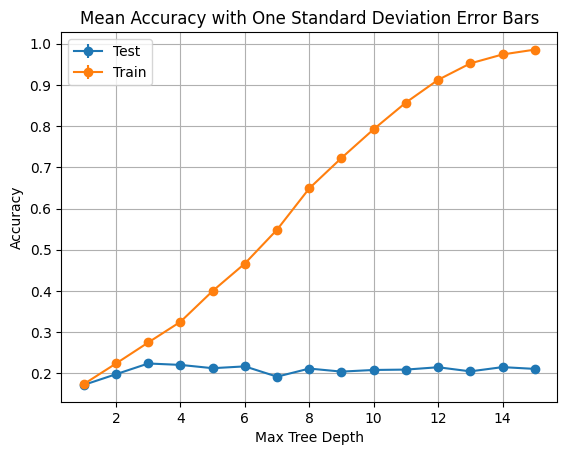

In [ ]:
# Plot the test mean with error bars
plt.errorbar(range(1, 16), test_acc_mean, yerr=test_acc_std, label='Test', fmt='-o')
# Plot the train mean with error bars
plt.errorbar(range(1, 16), train_acc_mean, yerr=train_acc_std, label='Train', fmt='-o')

plt.title('Mean Accuracy with One Standard Deviation Error Bars')
plt.ylabel('Accuracy')
plt.xlabel('Max Tree Depth')
plt.grid()
plt.legend()
plt.show()

**Q 3.2.3**

1. Is there a lot of variation of the performance of the trees (enough to question statistical significance)?
2. Which model (of the ones you tested) performed best on the training set? Which performed best on the test set?
3. At what depth do models start to overfit the training data?

*Your answer here*
1. Not really, as there seems to be a constant performance on test accuracy
2. All seem to perform quite badly
3. Depth 6

## Question 3.3 -- Random Forests
Just like in the decision trees, one hyperparameter you can choose is the depth of the tree. However, another important one is the number of decision trees. In this case, the performance is affected by the combination of these hyperparameters, and so we need to train and evaluate them at each combination.

**Q 3.3.1** Loop over $n_{trees}=10$ to $n_{trees}=100$ in increments of 10, and max tree depths from $d\in[1,3,5,7,9,11,13,15]$ and store the mean and standard deviation of train and test scores for 5 randomly initialised trees.

*Expected runtime: ~9 minutes*

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from tqdm import tqdm
import numpy as np


n_trees_range = range(10, 110, 10)
depths = [1, 3, 5, 7, 9, 11, 13, 15]


train_acc_mean = np.zeros((len(n_trees_range), len(depths)))
train_acc_std = np.zeros((len(n_trees_range), len(depths)))
test_acc_mean = np.zeros((len(n_trees_range), len(depths)))
test_acc_std = np.zeros((len(n_trees_range), len(depths)))


for tree_idx, n_trees in tqdm(enumerate(n_trees_range), total=len(n_trees_range)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []
        for n in range(5):

            model_rfc = RFC(n_estimators=n_trees, max_depth=d, random_state=n)

            model_rfc.fit(train_X_flattened, train_y)

            train_perfs.append(model_rfc.score(train_X_flattened, train_y))
            test_perfs.append(model_rfc.score(test_X_flattened, test_y))

        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx] = np.std(test_perfs)

100%|██████████| 10/10 [10:25<00:00, 62.51s/it]


Looping over several variables and testing each combination is called a **grid search**. Since we have two hyperparameters, we cannot plot a 1D line to see which is best, as we did for normal DTs. One way to visualize this instead is a heatmap. For this, we can `seaborn`'s [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.  

**Q 3.3.2** Plot two heatmaps: one for the train accuracies and one for the test ones.

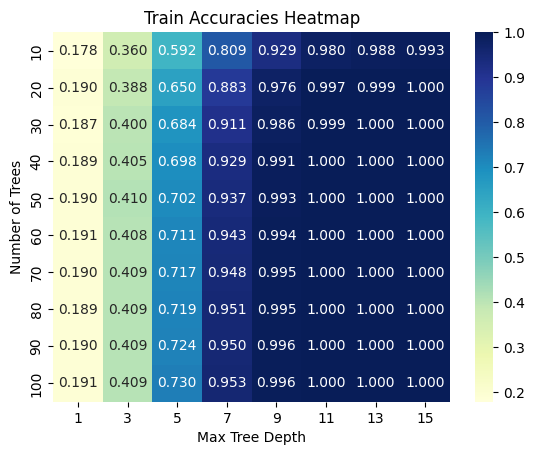

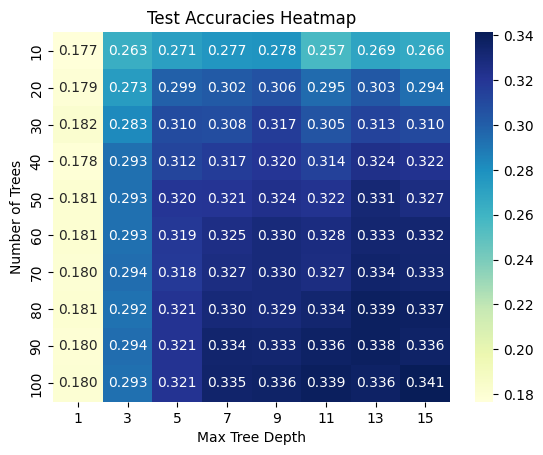

In [ ]:
import seaborn as sns

# Figure 1: Train Accuracies Heatmap
plt.figure()
# Create seaborn heatmap with annotations
sns.heatmap(train_acc_mean, annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=depths, yticklabels=n_trees_range)
plt.title('Train Accuracies Heatmap')
plt.xlabel('Max Tree Depth')
plt.ylabel('Number of Trees')
plt.show()

# Figure 2: Test Accuracies Heatmap
plt.figure()
# Create seaborn heatmap with annotations
sns.heatmap(test_acc_mean, annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=depths, yticklabels=n_trees_range)
plt.title('Test Accuracies Heatmap')
plt.xlabel('Max Tree Depth')
plt.ylabel('Number of Trees')
plt.show()

**Q 3.3.2**
1. What trends with respect to each hyperparameter do the heatmaps show you?
2. What model performs best on the train set? What model performs best on the test set?
3. What model would you choose to deploy and why?

*Your answer here*

## Question 3.4 -- Support Vector Machines

`sklearn`'s SVM classifier implementation (called "SVC", we already met them in the lecture) contains quite a number of hyperparameters you can tune. The ones we are looking at today are the kernel, the parameter `C` (which is some penalty term for incorrectly classifying a data point, applicable to the RBF kernel), `gamma`, which is a measure of how important closer points to the decision boundary are with respect to the decision boundary (applicable to the RBF kernel), and `degree`, which is the degree of the polynomial function (applicable to the poly kernel). Let $C\in\{0.1, 1, 10, 100\}$ and $gamma\in\{10^x|-2\leq x\leq 2, x\in\mathbb{Z}\}$. Let us use $degree\in\{2,3,4\}$.

A note about the kernel: In short, this is a function that determines what the shape of the decision boundary are. The choices that we can check out here (there are more) are `linear` (linear decision boundary), `poly` (polynomial) and `rbf` (radial basis function) in order of flexibility.

Since we are trying to optimize for a number of different parameters, writing out all the code ourselves gets a bit messy. Instead, we use `sklearn` again! The class in question is called `GridSearchCV`, which performs a grid search over parameters with specified values.

The 'CV' part of the name refers to the fact that we are performing *cross-validation*, which is related to the concept of validation sets that we encountered last week. We will cover it in a future lecture, but for now, the way it works is that it splits the training set into $k$ sets (called 'folds') and iteratively trains on $k-1$ folds and validates on the remaining one. The result is the mean over $k$ iterations. CV is considered the 'gold standard' with respect to analysing model robustness. We will use $k=5$ (appropriately called *5-fold cross-validation*), which is standard for a first analysis.

**Q 3.4.1** Run a gridsearch with 5-fold cross-validation over the hyperparameters discussed above to find an optimal SVC model. Please look at GridSearchCV's documentation for more information.

*Expected runtime: Around 15 minutes if you're lucky.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
from tensorflow.keras.datasets import cifar10

def flatten_cifar10(samples):
    return samples.reshape(samples.shape[0], -1)

def get_data_subset(n_train, n_test):
    (train_X, train_y), (_, _) = cifar10.load_data()
    train_X, train_y = train_X[:n_train], train_y[:n_train]
    return train_X, train_y


train_X, train_y = get_data_subset(1000, 1000)

train_X_flattened = flatten_cifar10(train_X)

param_grid_svm = [
    {'kernel': ['linear', 'poly', 'rbf'],
     'C': [0.1, 1, 10, 100],
     'degree': [2, 3, 4],
     'gamma': [10**x for x in range(-2, 3)]}

# Create the cross-validation object
optimal_params_svm = GridSearchCV(
    estimator=SVC(),             # Support Vector Classifier instance
    param_grid=param_grid_svm,   # grid search params
    cv=5,                        # k=5 CV
    scoring='accuracy',          # Use accuracy measure for best hyperparameters
)

optimal_params_svm.fit(train_X_flattened, train_y)


print(
    "The best parameters are %s with a score of %0.2f"
    % (optimal_params_svm.best_params_, optimal_params_svm.best_score_)
)

170498071/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

**Q 3.4.2**
1. How many combinations of parameters are there? Why?
2. Using 5-fold validation, how many models do you train in total?

Code didn't run even after waiting for about 2 hours

**Q 3.4.3**
Create a model `modelSVC` with the optimal parameters you found above and print out the train and test accuracies.

In [ ]:
modelSVC = SVC(...) # create model
modelSVC = ...      # train model
print("Training score:", ...)
print("Testing score: ", ...)

In [10]:
best_params = optimal_params_svm.best_params_

modelSVC = SVC(**best_params)

modelSVC.fit(train_X_flattened, train_y)

train_accuracy = modelSVC.score(train_X_flattened, train_y)

test_accuracy = modelSVC.score(flatten_cifar10(test_X), test_y)

print("Training score:", train_accuracy)
print("Testing score: ", test_accuracy)

NameError: name 'optimal_params_svm' is not defined

## Question 4 -- Training and inference speed
Depending on the application, the choice of model may be affected by more than just the raw score. One of these factors is *time* -- specifically, how long does the model take to train, and how long does it take to make a prediction. In this case we're increasing the number of training points to 5000.

**Q 4.1** Create models with the  that you found above, measure how long it takes for it to train and classify images from the test and train set, along with their accuracies (a classification, or a single run of a model, is generally called an 'inference'). We generally store time with an action taken (fit or inference) *per image* and the inference times *per image*.

*Runtime: ~3mins*

In [6]:
from time import perf_counter
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def get_data_subset(n_train, n_test):
    (train_X, train_y), (test_X, test_y) = cifar10.load_data()
    train_X, train_y = train_X[:n_train], train_y[:n_train]
    test_X, test_y = test_X[:n_test], test_y[:n_test]
    return train_X, train_y, test_X, test_y

# Flatten the images
def flatten_cifar10(samples):
    return samples.reshape(samples.shape[0], -1)

# Set up lists to store scores and times
train_scores = []
test_scores = []
fit_times = []
inf_times = []

def train_and_eval(model, train_X, train_y, test_X, test_y):
    """ Trains, times, and evaluates a given instantiated model on data """
    start = perf_counter()  # Check current (start) time
    model.fit(train_X, train_y)  # Train the model
    end = perf_counter()  # Check current (end) time
    fit_time = end - start  # Compute interval for training time

    # Time inference over train score
    start = perf_counter()
    train_score = model.score(train_X, train_y)
    end = perf_counter()
    train_score_time = (end - start) / len(train_X)  # Compute inference time per image

    # Time inference over test score
    start = perf_counter()
    test_score = model.score(test_X, test_y)
    end = perf_counter()
    test_score_time = (end - start) / len(test_X)  # Compute inference time per image

    return train_score, test_score, fit_time, train_score_time, test_score_time

n_train, n_test = 5000, 1000  # Update the number of training and testing points
train_X, train_y, test_X, test_y = get_data_subset(n_train, n_test)

# Flatten images
train_X_flattened = flatten_cifar10(train_X)
test_X_flattened = flatten_cifar10(test_X)

# Create models
modelLR = LogisticRegression()
modelDT = DecisionTreeClassifier()
modelRFC = RandomForestClassifier()
modelSVC = SVC()

# Iterate over each model and evaluate
for model in tqdm([modelLR, modelDT, modelRFC, modelSVC]):
    train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(model, train_X_flattened, train_y, test_X_flattened, test_y)
    # Append these values to the respective lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    fit_times.append(fit_time)
    inf_times.append((train_score_time, test_score_time))


  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 50%|█████     | 2/4 [00:39<00:39, 19.66s/it]<ipython-input-6-640af67ea4ca>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Plot two barplots:
1. **Q 4.2** On one, plot a dual barplot showing the test and train accuracies.
2. **Q 4.3** On the other, plot a double barplot showing the training time *per image* and the inference times *per image* (so divide the total time by the number of images).

For each, make sure you don't forget the unit of measurement, add a title and axis labels and make sure there are labels and a legend.

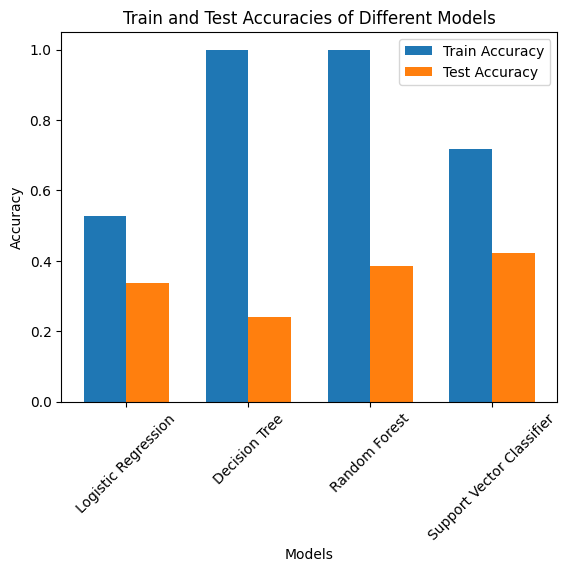

In [7]:
import numpy as np
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier']
bar_width = 0.35

# Create an array for the x-axis positions
x = np.arange(len(model_names))

# Plotting the bars
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, train_scores, bar_width, label='Train Accuracy')
bar2 = ax.bar(x + bar_width/2, test_scores, bar_width, label='Test Accuracy')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracies of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.show()

In [ ]:
# Plotting the times
fig, ax = plt.subplots()
bar1 = ax.bar(...) # fit times: don't forget labels
bar2 = ax.bar(...) # inference times

# Add labels, title, and legend
# set proper x ticks

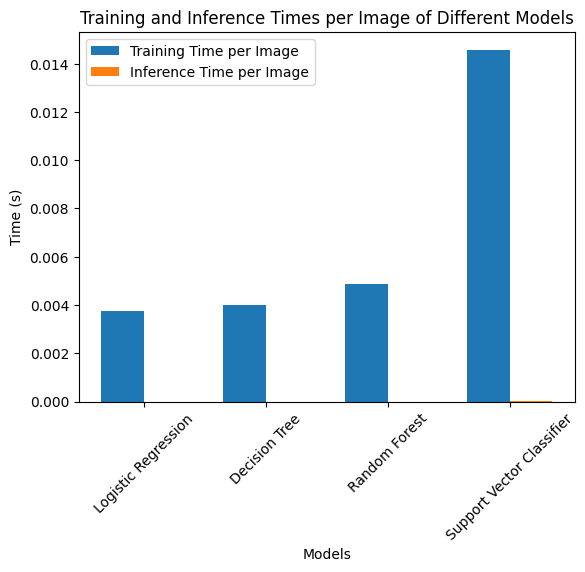

In [9]:
# Plotting the times
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, [time/len(train_X) for time in fit_times], bar_width, label='Training Time per Image')
bar2 = ax.bar(x + bar_width/2, [time[0]/len(train_X) for time in inf_times], bar_width, label='Inference Time per Image')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Time (s)')
ax.set_title('Training and Inference Times per Image of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.show()

**Q 4.4**
1. What model is the fastest to train?
2. What model is fastest to infer?
3. What model has the highest train accuracies? What model has the highest test accuracies?
4. What model would you choose to use? Why?

1. Logistic Regression
2. Not visible from the graph
3. Train: Decision Tree, Test: Support Vector Classifier
4. Probably the decision tree, as it has a relatively low training and inference time, but a relatively high train and test accuracy